In [110]:
import scipy
from scipy import interpolate
from scipy import integrate
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

In [111]:
a = 0.5
b = 0.3
N = 1000000
S = 990000
I = 7000
R = 3000
t_0, t_f = 0, 25
time = np.linspace(t_0, t_f, 25)

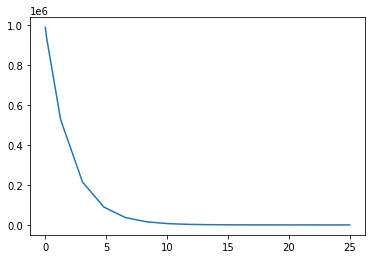

In [112]:
def dsdt(t,S):
    return (- a * S)

suscept = integrate.solve_ivp (dsdt, (t_0, t_f), [S],  dense_output=True)
plt.plot(suscept.t, suscept.y[0])
plt.show()

In [113]:
def s_exp(a,t,S):
    return S * pow(np.e, -a*t)

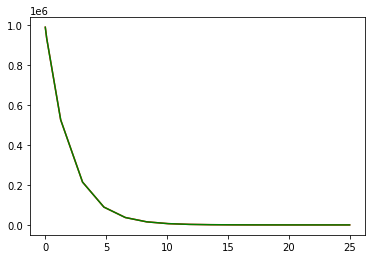

In [114]:
def diff_S(a,t,S):
    return S - s_exp(a,t,S) 

tos = suscept.t
So = suscept.y[0]

sol_S, _ = optimize.leastsq(diff_S, 1, args=(tos, So))
a_S = sol_S[0]
S_exp = So*pow(np.e, -a_S*tos)
plt.plot(tos, So, 'r')
plt.plot(tos, S_exp, 'g')
plt.show()

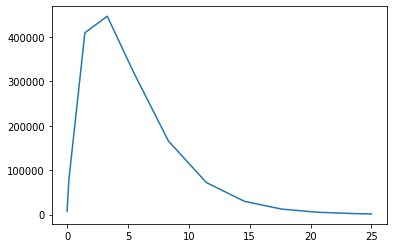

In [115]:
def didt(t,I):
    return (a * suscept.sol(t) - b * I)

infect = integrate.solve_ivp (didt, (t_0, t_f), [I],  dense_output=True )
plt.plot(infect.t, infect.y[0])
plt.show()

In [116]:
def i_exp(a, t, I):
    return (I + a * S * pow(np.e, -a*t) * t) * pow(np.e, -a*t)

def diff_I (a, t, I):
    return I - i_exp(a, t, I)

In [117]:
toi = infect.t
Io = infect.y[0]
sol_I, _ = optimize.leastsq(diff_I, 1, args=(toi, Io))
print(sol_I[0])

0.14169111875362475


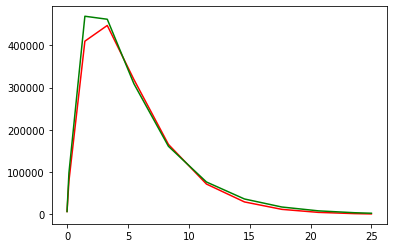

In [187]:
a_I = sol_I[0]
I_exp = (Io + a_I * S * pow(np.e, -a_I*toi) * toi) * pow(np.e, -a_I*toi)
plt.plot(toi, Io, 'r')
plt.plot(toi, I_exp, 'g')
plt.show()

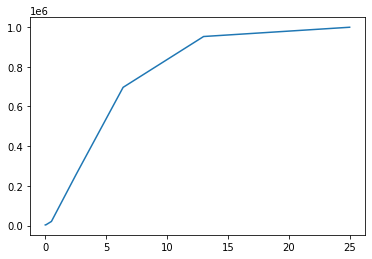

In [123]:
def drdt(t,R):
    return (b * infect.sol(t))

recov = integrate.solve_ivp(drdt, (t_0, t_f), [R],  dense_output=True)
plt.plot(recov.t, recov.y[0])
plt.show()

In [124]:
def r_exp(a, t, I, S, N):
    return N - S * pow(np.e, -a*t) - (I + a * S * pow(np.e, -a*t) * t) * pow(np.e, -a*t)
def diff_r(a, t, I, S, N):
    return R - r_exp(a, t, I, S, N)



In [129]:
tor = recov.t
Ro = recov.y[0]
sol_R, _ = optimize.leastsq(diff_r, 1, args=(tor, I, S, N))
a_R = sol_R[0]

t = time
S25 = suscept.sol(t)[0]
I25 = infect.sol(t)[0]
R25 = recov.sol(t)[0]

R_exp = N - S25*pow(np.e, -a_R*t) - (I25 + a_R * S25 * t) * pow(np.e, -a_R*t)

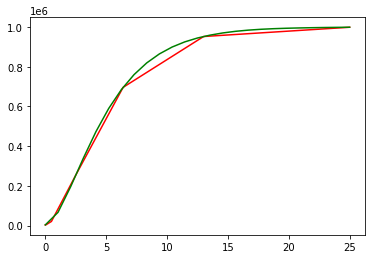

In [131]:
plt.plot(tor, Ro, 'r')
plt.plot(t, R_exp, 'g')
plt.show()

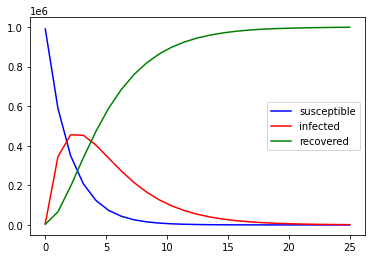

In [136]:
plt.plot(t, S25, 'b', label='susceptible')
plt.plot(t, I25, 'r', label='infected')
plt.plot(t, R25, 'g', label='recovered')
plt.legend()
plt.show()

In [186]:
def i_func(t, a, I):
    return -(I + a * S * pow(np.e, -a*t) * t) * pow(np.e, -a*t)

t_max = optimize.minimize_scalar(i_func, [2,5], args=(a_I,I)).x
print(t_max)

3.487902880880005
